# Implementing first steps with genetic programming

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def computeGeneration(x, y, z, gen):
    results = [[np.sum(np.array(chromosom)**2), chromosom] for chromosom in zip(x, y, z)]
        
    score, _ = zip(*results)
    score = np.sum(score)

    _, chromosoms = zip(*sorted(results, key=lambda x: x[0])[:best])

    new_normal = [[randomNormal(liste, i) for i in range(size)] for liste in zip(*chromosoms)]
        
    return (new_normal[0], new_normal[1], new_normal[2], score)


def randomNormal(x, i):
    #return np.random.normal(loc=np.random.choice(x), scale=(np.std(x)+1)/(i+1), size=1)[0] # 40-60, 20
    #return np.random.normal(loc=np.random.choice(x), scale=(np.std(x)), size=1)[0] # 10-20, 30000
    #return np.random.normal(loc=np.random.choice(x), scale=(np.std(x)+1), size=1)[0] # 5-10, 1000
    #return np.random.normal(loc=np.random.choice(x), scale=(np.std(x)+0.1)/(i+1), size=1)[0] # 20-100, 0.25
    return np.random.normal(loc=np.random.choice(x), scale=(np.std(x)+1), size=1)[0]

iterations = 100
size = 10
best = 5

result_2 = []
for _ in range(size):
    x = np.random.normal(loc=10, scale=1, size=size).tolist()
    y = np.random.normal(loc=20, scale=0.5, size=size).tolist()
    z = np.random.normal(loc=5, scale=10, size=size).tolist()
    
    result = []
    for gen in range(iterations):
        x, y, z, score = computeGeneration(x, y, z, gen)
        result.append(score)
    result_2.append(result)

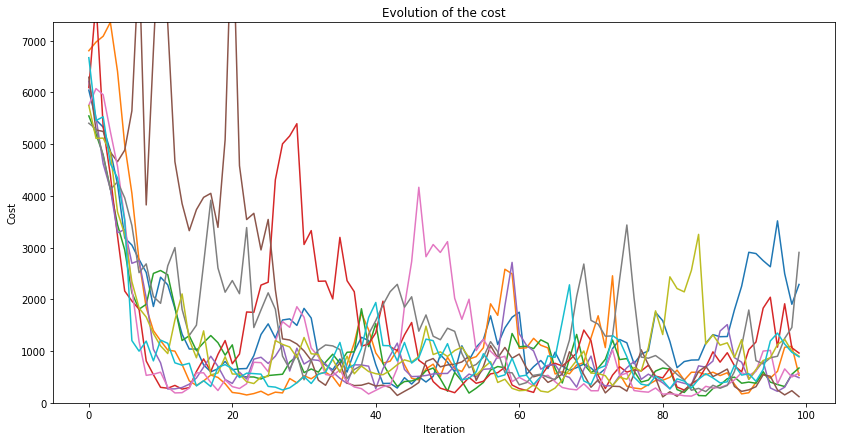

In [2]:
plt.figure(figsize=(14,7))
for line in result_2:
    plt.plot(line)
plt.ylim(0,max(max(result_2)))
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Evolution of the cost')
plt.show()

Für jede Variable wird eine Verteilung erstellt.

Für jede Variable werden x Zahlen aus der Verteilung gezogen.

Mit zip(*) lassen sich die x Chromosomen anwählen.

Jedes der x Chromosome wird evaluiert auf seine Performance.

Die besten y Chromosomen werden ausgewählt und reproduzieren sich.

Die Performance der gesamten Generation mit x Chromosomen wird getestst.

In [3]:
def permutateGene(x):
    return np.random.choice(x, size=population)

def get_x(i=0, n=1):
    return np.random.normal(i, size=n)
def get_y(i=0, n=1):
    return np.random.normal(i, size=n)
def get_z(i=0, n=1):
    return np.random.normal(i, size=n)


func_dict = {0:get_x, 1:get_y, 2:get_z}


def evolvePopulation(data):
    individual_scores = np.sum(np.square(data), axis=0)
    data = np.vstack((data, individual_scores))

    data = data[:, np.argsort(data[3])][:-1, :reproduction]
    data = np.apply_along_axis(permutateGene, 1, data)

    for i in range(permutations):
        col = np.random.randint(population, size=3)
        data[0, col[0]] = func_dict[0](data[0, col[0]])
        data[1, col[1]] = func_dict[1](data[0, col[1]])
        data[2, col[2]] = func_dict[2](data[0, col[2]])
    return data

In [4]:
n = 100

pop = np.random.randint(1, 51, size=n)
rep = np.random.randint(1, 11, size=n)
per = np.random.randint(0, 5, size=n)
gen = np.random.randint(1, 101, size=n)
parameter = list(zip(pop, rep, per, gen))

scores = []
lines = []
for population, reproduction, permutations, generations in parameter:
    line = []    

    x = get_x(n=population)
    y = get_y(n=population)
    z = get_z(n=population)
    data = np.array([x, y, z])
    line.append(np.sum(data))

    for _ in range(generations):
        data = evolvePopulation(data)
        line.append(np.sum(data))
    score = np.sum(data)
    scores.append([population, reproduction, permutations, generations, score])
    lines.append(line)

In [5]:
import pandas as pd
df = pd.DataFrame(scores, columns=['Population', 'Reproduction', 'Permutations', 'Generations', 'Score'])
df['Difference'] = df['Population'] - df['Reproduction']
df['Normalised-Score'] = df['Score'] / df['Population']
df.head()

,Population,Reproduction,Permutations,Generations,Score,Difference,Normalised-Score
0,32,8,2,29,-0.950599,24,-0.029706
1,45,5,0,80,17.379473,40,0.386211
2,7,2,1,6,1.030183,5,0.147169
3,44,8,2,45,3.039384,36,0.069077
4,35,4,0,56,3.846712,31,0.109906


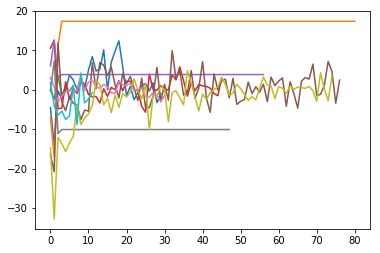

In [6]:
for line in lines[:10]:
    plt.plot(line)
plt.show()

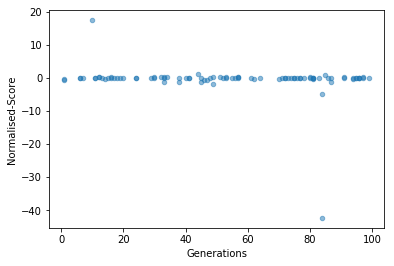

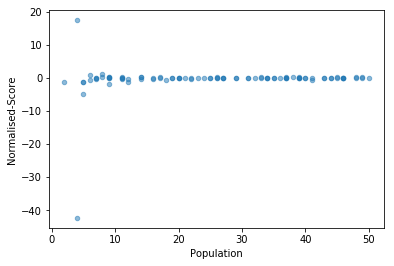

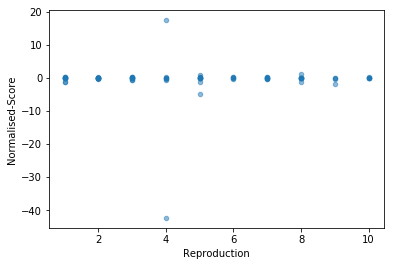

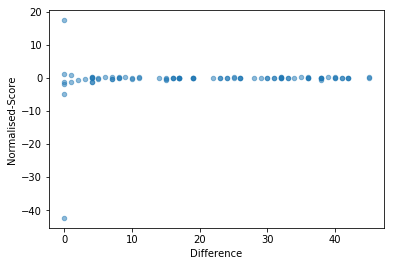

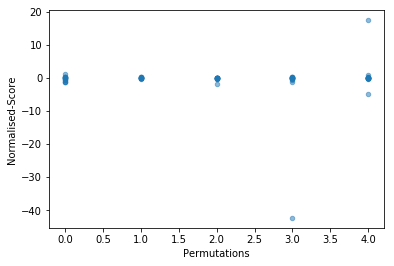

In [7]:
for col in ['Generations', 'Population', 'Reproduction', 'Difference', 'Permutations']:
    df[df['Difference']>=0].plot(kind='scatter', x=col, y='Normalised-Score', alpha=0.5)
    #plt.yscale('log')
    plt.show()

In [8]:
df.to_csv('Genetic_Programming_Data.csv', index=False)